<a href="https://colab.research.google.com/github/barauna-lo/Artificial_Inteligence/blob/main/CAP417_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/CAP4213-Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Computational Statistics

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)

These code was provide for [this](https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A05.ipynb) class exercice. 




# Exercice 4 - Pratical

Consider the small image dataset presented [here](https://github.com/vsantjr/CAP/tree/master/CAP417/Images). In order to solve this exercise, you need to:

* Read/open the images. There are several ways to do it (in Python, in other programming languages);
* Select image features. Image features are important to represent each image. Select at least two of these features.


Develop a program in order to:

1. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) to solve this item;
2. Estimate the probability density function for each component you have found in the previous item. Show the plots. What is the best bandwidth in this case?
3. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?


Deadline: 12 may 2022


IMPORTANT: The last date to finish and send all the exercises is 12 may 2022.

## $\bullet$  Read/open the images 📥📦

In [ ]:
!wget 'https://github.com/vsantjr/CAP/blob/master/CAP417/Images/imgsmall.zip?raw=true'
#import zipfile 
!unzip "/content/imgsmall.zip?raw=true" -d "/content/image"

--2022-05-09 16:07:53--  https://github.com/vsantjr/CAP/blob/master/CAP417/Images/imgsmall.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vsantjr/CAP/raw/master/CAP417/Images/imgsmall.zip [following]
--2022-05-09 16:07:54--  https://github.com/vsantjr/CAP/raw/master/CAP417/Images/imgsmall.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Images/imgsmall.zip [following]
--2022-05-09 16:07:54--  https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Images/imgsmall.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [ ]:
#Reading and allocating all figures names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('/content/image'):
    f.extend(filenames)
    break
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

I will use the same code used on [CAP 421 - Deep Leaning](https://github.com/barauna-lo/Deep-Learning/blob/main/AT1_CAP_421_Image_processing_basics_barauna_lo.ipynb) classes for read and print the image. For praticing we can use three librarys. But for all the exercice we will use only `openCv`

In [ ]:
#Import cv2 libary 
import cv2
#Reading all imagens on the 'image' folder
img = []
for i in range(len(f)):
  filename = '/content/image/'+f[i]
  img.append(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))

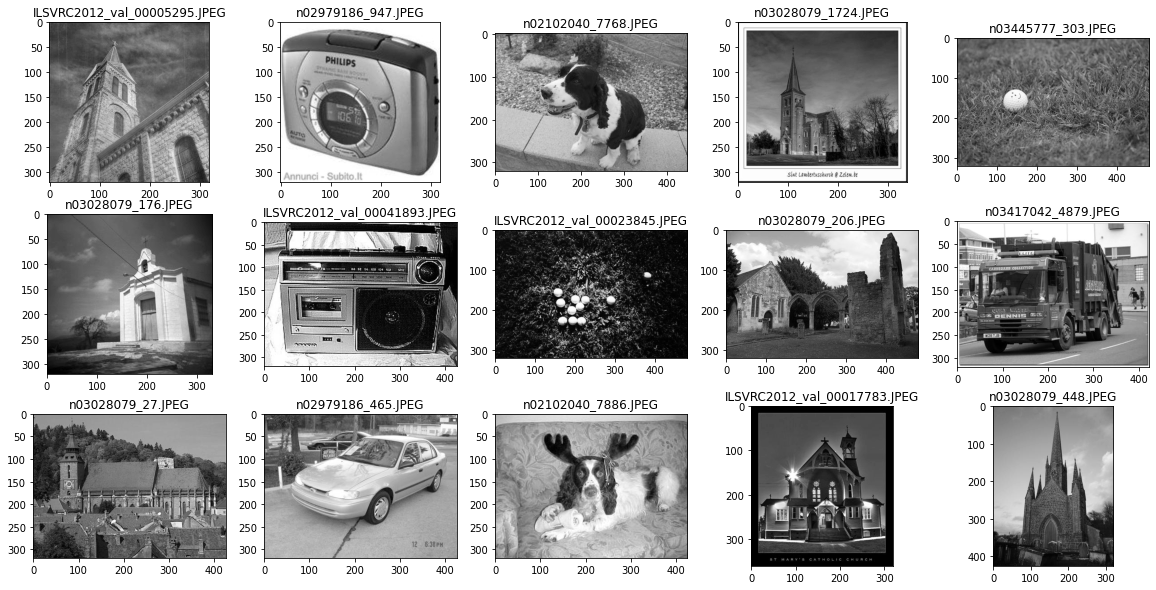

In [ ]:
#Lets take a look on the imagens
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#i=0
for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.imshow(img[i], cmap = 'gray')
  plt.title(f[i])
plt.show()

## $\bullet$ Select image features. 
Image features are important to represent each image. Select at least two of these features.

https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04 

## 1 - Present the components based on this dataset. 
Use Gaussian Mixture Models (GMMs) to solve this item;

## 2 - Estimate the probability density function for each component you have found in the previous item. Show the plots. 
What is the best bandwidth in this case?


## 3 - Estimate the probability density function for the entire dataset. 
* Show the plot. 
* What is the best bandwidth in this case?

In [ ]:
#Reading the data from github
df = pd.read_csv("https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Precipitation/precipitation.csv")

## 1 - Show that this dataset is normally distributed.

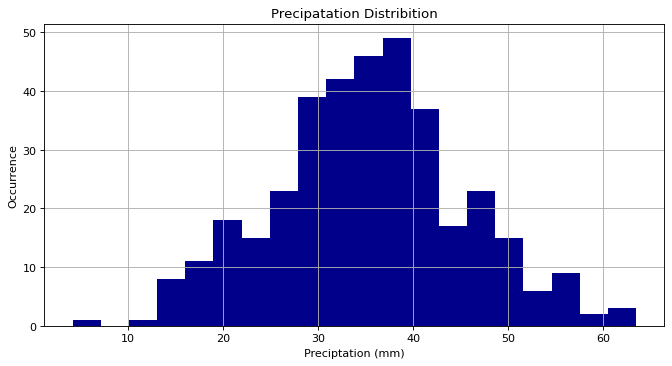

In [ ]:
#Creatin Figure Enveirment
figure(figsize=(10, 5), dpi=80)
plt.hist(df['Precipitation'],bins=20,color = 'darkblue')
plt.xlabel('Preciptation (mm)')
plt.ylabel('Occurrence')
plt.title('Precipatation Distribition')
plt.grid()
plt.show()

## 2 - Plot the raw data and also the pdf of this dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


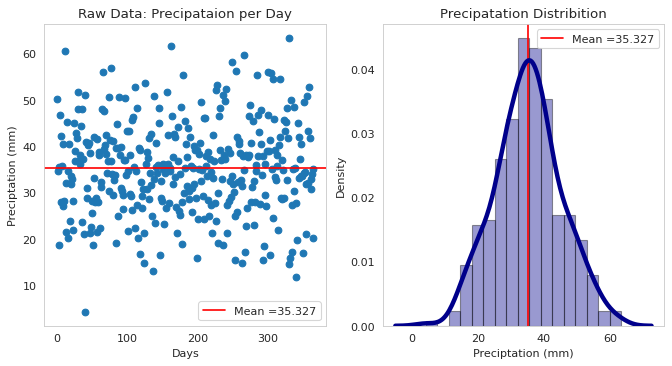

In [ ]:
figure(figsize=(10, 5), dpi=80)
plt.subplot(1,2,1)
plt.scatter(df.Day,df.Precipitation)
plt.xlabel('Days')
plt.ylabel('Preciptation (mm)')
plt.title('Raw Data: Precipataion per Day')
plt.axhline(y=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.legend()
plt.grid()



plt.subplot(1,2,2)
sns.distplot(df['Precipitation'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(x=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.xlabel('Preciptation (mm)')
plt.ylabel('Density')
plt.title('Precipatation Distribition')
plt.legend()
plt.grid()


plt.show()
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## 3 - Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?

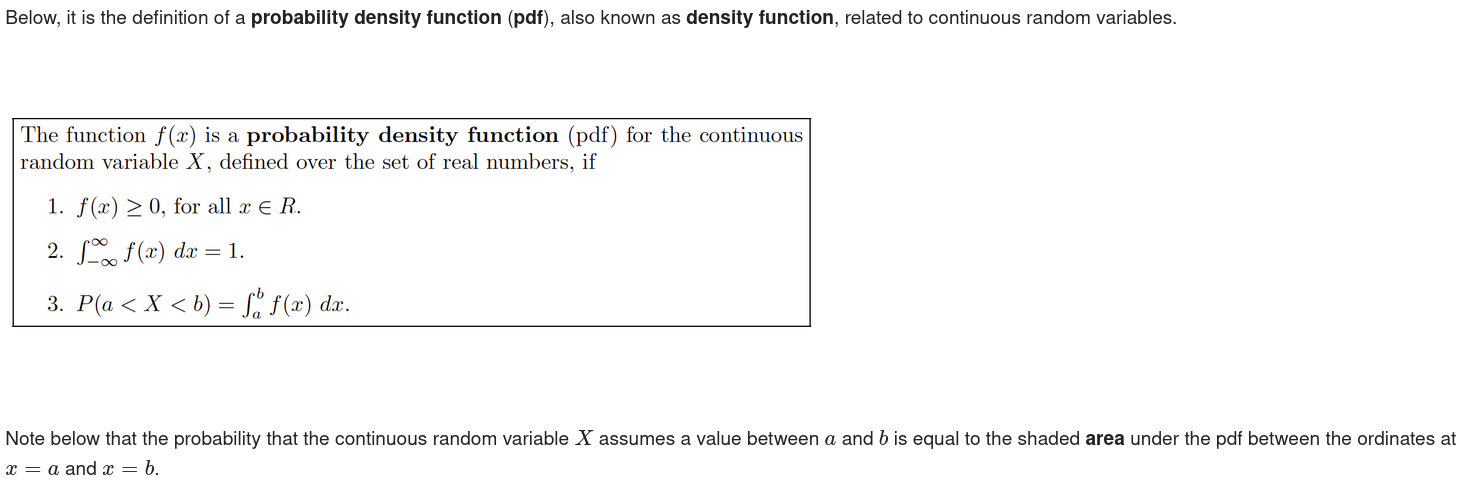

* If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


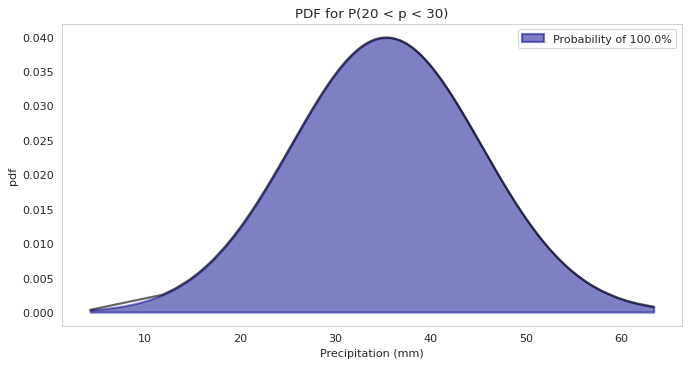

In [ ]:
#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition

# Intervals of Integrations
a,b = min(x),max(x)

# calculating P(a < x < b)
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)

#plot the area
figure(figsize=(10, 5), dpi=80)

# set data
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)

# for fill_between
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, color='darkblue', linewidth=2, label='Probability of '+str(prob*100)+'%')

#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()

As we can see, a complete area of the curvature in question represents a total of 100% probability, checking as a normal function

## 4 - What is the expected profit of this farm?

In [ ]:
#I use the calculus references used on the class
#https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb

def diff(x1, x2):
  mean1, std1 = mean, std
  cdf_x1,cdf_x2 = norm.cdf(x1,mean1,std1), norm.cdf(x2,mean1,std1)
  z1,z2 = (x1 - mean1)/std1, (x2 - mean1)/std1
  return norm.cdf(z2,0,1) - norm.cdf(z1,0,1)

print('{}% of R$ 50,000.00'.format(round((diff(47,round(max(x))))*100,2)))

print('{}% of R$ 100,000.00'.format(round((diff(30,47))*100,2)))
print('{}% of R$ 80,000.00'.format( round((diff(20,30))*100,2)))
print('{}% of R$ 35,000.00'.format( round((diff(10,20))*100,2)))
print('{}% of R$ -30,000.00'.format(round((diff(5,10))*100,2)))
print('{}% of R$ -50,000.00'.format(round((diff(5,0))*100,2)))


11.87% of R$ 50,000.00
58.13% of R$ 100,000.00
23.44% of R$ 80,000.00
5.7% of R$ 35,000.00
0.45% of R$ -30,000.00
-0.1% of R$ -50,000.00


## EXTRA

Plotting the probability distribution for each rainfall interval

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


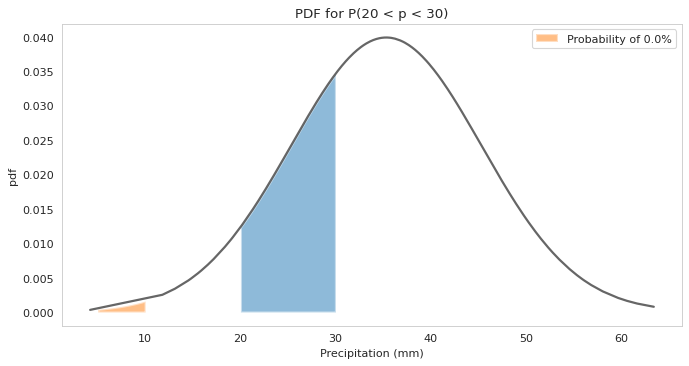

In [ ]:

#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition


figure(figsize=(10, 5), dpi=80)
#Pdf Curve
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)





# Intervals of Integrations
a,b = 20,30
px, y= np.arange(a, b, 0.01), norm.pdf(px, mean, std)
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='')


# # Intervals of Integrations
# a,b = 2 ,5
# px = np.arange(a, b, 0.01)
# y = norm.pdf(px, mean, std)
# prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
# axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')



# Intervals of Integrations
a,b = 5 ,10
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')




#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
case = [(2,5),(20,30)]

In [ ]:
f,j = case[0]

In [ ]:
f

2

# References

* [How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)
* [Image Feature Extraction: Traditional and Deep Learning Techniques](https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04)